In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import random
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import GridSearchCV

In [2]:
#load TATAMOTORS share price data
from nsepython import *
logging.basicConfig(level=logging.INFO)

symbol = "TATAMOTORS"
series = "EQ"
start_date = "01-09-2023"
end_date ="31-01-2024"
data=equity_history(symbol,series,start_date,end_date)

INFO:root:Starting Date: 2023-09-01 00:00:00
INFO:root:Ending Date: 2024-01-31 00:00:00
INFO:root:Total Number of Days: 152
INFO:root:Total FOR Loops in the program: 3
INFO:root:Remainder Loop: 32
INFO:root:Loop = 0
INFO:root:====
INFO:root:Starting Date: 01-09-2023
INFO:root:Ending Date: 11-10-2023
INFO:root:====
INFO:root:Length of the Table: 27
INFO:root:Loop = 1
INFO:root:====
INFO:root:Starting Date: 11-10-2023
INFO:root:Ending Date: 20-11-2023
INFO:root:====
INFO:root:Length of the Table: 55
INFO:root:Loop = 2
INFO:root:====
INFO:root:Starting Date: 20-11-2023
INFO:root:Ending Date: 30-12-2023
INFO:root:====
INFO:root:Length of the Table: 83
INFO:root:End Loop
INFO:root:====
INFO:root:Starting Date: 30-12-2023
INFO:root:Ending Date: 31-01-2024
INFO:root:====
INFO:root:Finale
INFO:root:Length of the Total Dataset: 105


In [3]:
data.info()   #verify loaded data and data type of features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    105 non-null    object 
 1   CH_SYMBOL              105 non-null    object 
 2   CH_SERIES              105 non-null    object 
 3   CH_MARKET_TYPE         105 non-null    object 
 4   CH_TRADE_HIGH_PRICE    105 non-null    float64
 5   CH_TRADE_LOW_PRICE     105 non-null    float64
 6   CH_OPENING_PRICE       105 non-null    float64
 7   CH_CLOSING_PRICE       105 non-null    float64
 8   CH_LAST_TRADED_PRICE   105 non-null    float64
 9   CH_PREVIOUS_CLS_PRICE  105 non-null    float64
 10  CH_TOT_TRADED_QTY      105 non-null    int64  
 11  CH_TOT_TRADED_VAL      105 non-null    float64
 12  CH_52WEEK_HIGH_PRICE   105 non-null    float64
 13  CH_52WEEK_LOW_PRICE    105 non-null    float64
 14  CH_TOTAL_TRADES        105 non-null    int64  
 15  CH_ISI

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.describe()   #evaluate basic statistics of dataframe and its featured

,CH_TRADE_HIGH_PRICE,CH_TRADE_LOW_PRICE,CH_OPENING_PRICE,CH_CLOSING_PRICE,CH_LAST_TRADED_PRICE,CH_PREVIOUS_CLS_PRICE,CH_TOT_TRADED_QTY,CH_TOT_TRADED_VAL,CH_52WEEK_HIGH_PRICE,CH_52WEEK_LOW_PRICE,CH_TOTAL_TRADES,__v,VWAP
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,1.050000e+02,1.050000e+02,105.000000,105.000000,105.000000,105.0,105.000000
mean,701.584286,687.471905,694.614286,694.363333,694.635714,691.702381,1.033815e+07,7.262528e+09,717.542857,378.808571,213690.933333,0.0,694.643810
std,73.606784,70.310583,71.011171,72.478606,72.729657,70.605401,5.470654e+06,4.245632e+09,62.140431,8.101844,75518.707426,0.0,72.181739
min,612.550000,601.900000,604.200000,609.000000,609.700000,601.000000,2.245583e+06,1.469022e+09,665.400000,375.200000,76427.000000,0.0,608.590000
25%,638.200000,627.300000,633.950000,634.000000,634.200000,630.550000,6.951690e+06,4.689892e+09,665.400000,375.200000,158780.000000,0.0,633.200000
50%,681.950000,670.700000,674.000000,673.700000,673.500000,671.550000,8.969405e+06,6.247447e+09,685.500000,375.200000,206068.000000,0.0,674.640000
75%,734.000000,725.150000,730.950000,730.800000,730.150000,728.950000,1.175957e+07,8.341682e+09,734.750000,375.200000,243381.000000,0.0,729.160000
max,896.500000,865.200000,865.200000,884.200000,884.800000,858.850000,4.117019e+07,3.233783e+10,896.500000,400.450000,593211.000000,0.0,882.170000


In [6]:
df_TATAMOTORS=pd.DataFrame(data)  # convert into dataframe

In [7]:
df_TATAMOTORS.head()  #verify top few records of data frame

,_id,CH_SYMBOL,CH_SERIES,CH_MARKET_TYPE,CH_TRADE_HIGH_PRICE,CH_TRADE_LOW_PRICE,CH_OPENING_PRICE,CH_CLOSING_PRICE,CH_LAST_TRADED_PRICE,CH_PREVIOUS_CLS_PRICE,...,CH_TOTAL_TRADES,CH_ISIN,CH_TIMESTAMP,TIMESTAMP,createdAt,updatedAt,__v,SLBMH_TOT_VAL,VWAP,mTIMESTAMP
0,6592a97fd65750cefa0ecd8c,TATAMOTORS,EQ,N,798.7,781.05,785.00,790.60,792.0,779.95,...,280616,INE155A01022,2024-01-01,2023-12-31T18:30:00.000Z,2024-01-01T12:01:03.768Z,2024-01-01T12:01:03.768Z,0,None,791.96,01-Jan-2024
1,6593faff477df5351421c5d5,TATAMOTORS,EQ,N,804.0,779.00,800.50,784.40,786.0,790.60,...,292570,INE155A01022,2024-01-02,2024-01-01T18:30:00.000Z,2024-01-02T12:01:03.522Z,2024-01-02T12:01:03.522Z,0,None,787.89,02-Jan-2024
2,65954c805fafc6a4b205f08b,TATAMOTORS,EQ,N,790.0,776.25,786.05,781.45,782.6,784.40,...,235425,INE155A01022,2024-01-03,2024-01-02T18:30:00.000Z,2024-01-03T12:01:04.452Z,2024-01-03T12:01:04.452Z,0,None,782.06,03-Jan-2024
3,65969dff05e0b9eee7e86679,TATAMOTORS,EQ,N,801.8,791.30,798.00,795.75,795.7,781.45,...,311507,INE155A01022,2024-01-04,2024-01-03T18:30:00.000Z,2024-01-04T12:01:03.865Z,2024-01-04T12:01:03.865Z,0,None,796.06,04-Jan-2024
4,6597ef7fc10efb305b159123,TATAMOTORS,EQ,N,805.9,787.10,799.00,790.95,792.0,795.75,...,267335,INE155A01022,2024-01-05,2024-01-04T18:30:00.000Z,2024-01-05T12:01:03.451Z,2024-01-05T12:01:03.451Z,0,None,795.04,05-Jan-2024


In [8]:
df_TATAMOTORS.isnull().sum()  #check null values in each column

_id                        0
CH_SYMBOL                  0
CH_SERIES                  0
CH_MARKET_TYPE             0
CH_TRADE_HIGH_PRICE        0
CH_TRADE_LOW_PRICE         0
CH_OPENING_PRICE           0
CH_CLOSING_PRICE           0
CH_LAST_TRADED_PRICE       0
CH_PREVIOUS_CLS_PRICE      0
CH_TOT_TRADED_QTY          0
CH_TOT_TRADED_VAL          0
CH_52WEEK_HIGH_PRICE       0
CH_52WEEK_LOW_PRICE        0
CH_TOTAL_TRADES            0
CH_ISIN                    0
CH_TIMESTAMP               0
TIMESTAMP                  0
createdAt                  0
updatedAt                  0
__v                        0
SLBMH_TOT_VAL            105
VWAP                       0
mTIMESTAMP                 0
dtype: int64

In [9]:
df_TATAMOTORS.columns.unique  # check list of unique features

<bound method Index.unique of Index(['_id', 'CH_SYMBOL', 'CH_SERIES', 'CH_MARKET_TYPE',
       'CH_TRADE_HIGH_PRICE', 'CH_TRADE_LOW_PRICE', 'CH_OPENING_PRICE',
       'CH_CLOSING_PRICE', 'CH_LAST_TRADED_PRICE', 'CH_PREVIOUS_CLS_PRICE',
       'CH_TOT_TRADED_QTY', 'CH_TOT_TRADED_VAL', 'CH_52WEEK_HIGH_PRICE',
       'CH_52WEEK_LOW_PRICE', 'CH_TOTAL_TRADES', 'CH_ISIN', 'CH_TIMESTAMP',
       'TIMESTAMP', 'createdAt', 'updatedAt', '__v', 'SLBMH_TOT_VAL', 'VWAP',
       'mTIMESTAMP'],
      dtype='object')>

In [10]:
df_TATAMOTORS.shape  #check the shape of data frame

(105, 24)

In [11]:
df_TATAMOTORS.sort_values(by="CH_TIMESTAMP",ascending=False)   # arrange data based on dates since its time series data

,_id,CH_SYMBOL,CH_SERIES,CH_MARKET_TYPE,CH_TRADE_HIGH_PRICE,CH_TRADE_LOW_PRICE,CH_OPENING_PRICE,CH_CLOSING_PRICE,CH_LAST_TRADED_PRICE,CH_PREVIOUS_CLS_PRICE,...,CH_TOTAL_TRADES,CH_ISIN,CH_TIMESTAMP,TIMESTAMP,createdAt,updatedAt,__v,SLBMH_TOT_VAL,VWAP,mTIMESTAMP
21,65ba367f77ad05184c68ebff,TATAMOTORS,EQ,N,896.50,865.20,865.20,884.20,884.80,858.85,...,408702,INE155A01022,2024-01-31,2024-01-30T18:30:00.000Z,2024-01-31T12:01:03.328Z,2024-01-31T12:01:03.328Z,0,None,882.17,31-Jan-2024
20,65b8e4ff11b384b5b95b0a34,TATAMOTORS,EQ,N,885.95,842.85,843.00,858.85,864.90,841.00,...,349849,INE155A01022,2024-01-30,2024-01-29T18:30:00.000Z,2024-01-30T12:01:03.527Z,2024-01-30T12:01:03.527Z,0,None,863.55,30-Jan-2024
19,65b79380973fc28b34e1fdc9,TATAMOTORS,EQ,N,843.80,811.05,811.85,841.00,840.55,811.85,...,250441,INE155A01022,2024-01-29,2024-01-28T18:30:00.000Z,2024-01-29T12:01:04.049Z,2024-01-29T12:01:04.049Z,0,None,830.88,29-Jan-2024
18,65b24d7e44a9da0c3c0d6bd5,TATAMOTORS,EQ,N,814.15,800.30,814.00,811.85,810.55,810.90,...,182572,INE155A01022,2024-01-25,2024-01-24T18:30:00.000Z,2024-01-25T12:01:02.991Z,2024-01-25T12:01:02.991Z,0,None,809.73,25-Jan-2024
17,65b0fbfffd857037aa420016,TATAMOTORS,EQ,N,812.00,788.50,802.40,810.90,811.65,800.45,...,183775,INE155A01022,2024-01-24,2024-01-23T18:30:00.000Z,2024-01-24T12:01:03.959Z,2024-01-24T12:01:03.959Z,0,None,803.01,24-Jan-2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,64f9bb7ff5e18c7fa1ee9747,TATAMOTORS,EQ,N,616.50,609.05,610.90,614.90,614.25,610.25,...,112863,INE155A01022,2023-09-07,2023-09-06T18:30:00.000Z,2023-09-07T12:01:03.392Z,2023-09-07T12:01:03.392Z,0,None,613.64,07-Sep-2023
81,64f869debd4ee5a4ffc95625,TATAMOTORS,EQ,N,612.55,605.60,611.15,610.25,610.60,611.15,...,142267,INE155A01022,2023-09-06,2023-09-05T18:30:00.000Z,2023-09-06T12:00:30.491Z,2023-09-06T12:00:30.491Z,0,None,608.59,06-Sep-2023
80,64f7187f4597811962c9dc09,TATAMOTORS,EQ,N,618.90,608.05,610.00,611.15,611.50,609.00,...,131391,INE155A01022,2023-09-05,2023-09-04T18:30:00.000Z,2023-09-05T12:01:03.870Z,2023-09-05T12:01:03.870Z,0,None,612.62,05-Sep-2023
79,64f5c957c5c7d75876dc3933,TATAMOTORS,EQ,N,615.60,606.00,615.60,609.00,609.70,611.20,...,173185,INE155A01022,2023-09-04,2023-09-03T18:30:00.000Z,2023-09-04T12:11:03.409Z,2023-09-04T12:11:03.409Z,0,None,609.08,04-Sep-2023


In [12]:
df_TATAMOTORS["Timestamp_sorted"]=pd.to_datetime(df_TATAMOTORS["CH_TIMESTAMP"])  #convert data and time column into datetime format

In [13]:
df_TATAMOTORS.head()  # verify data frame

,_id,CH_SYMBOL,CH_SERIES,CH_MARKET_TYPE,CH_TRADE_HIGH_PRICE,CH_TRADE_LOW_PRICE,CH_OPENING_PRICE,CH_CLOSING_PRICE,CH_LAST_TRADED_PRICE,CH_PREVIOUS_CLS_PRICE,...,CH_ISIN,CH_TIMESTAMP,TIMESTAMP,createdAt,updatedAt,__v,SLBMH_TOT_VAL,VWAP,mTIMESTAMP,Timestamp_sorted
0,6592a97fd65750cefa0ecd8c,TATAMOTORS,EQ,N,798.7,781.05,785.00,790.60,792.0,779.95,...,INE155A01022,2024-01-01,2023-12-31T18:30:00.000Z,2024-01-01T12:01:03.768Z,2024-01-01T12:01:03.768Z,0,None,791.96,01-Jan-2024,2024-01-01
1,6593faff477df5351421c5d5,TATAMOTORS,EQ,N,804.0,779.00,800.50,784.40,786.0,790.60,...,INE155A01022,2024-01-02,2024-01-01T18:30:00.000Z,2024-01-02T12:01:03.522Z,2024-01-02T12:01:03.522Z,0,None,787.89,02-Jan-2024,2024-01-02
2,65954c805fafc6a4b205f08b,TATAMOTORS,EQ,N,790.0,776.25,786.05,781.45,782.6,784.40,...,INE155A01022,2024-01-03,2024-01-02T18:30:00.000Z,2024-01-03T12:01:04.452Z,2024-01-03T12:01:04.452Z,0,None,782.06,03-Jan-2024,2024-01-03
3,65969dff05e0b9eee7e86679,TATAMOTORS,EQ,N,801.8,791.30,798.00,795.75,795.7,781.45,...,INE155A01022,2024-01-04,2024-01-03T18:30:00.000Z,2024-01-04T12:01:03.865Z,2024-01-04T12:01:03.865Z,0,None,796.06,04-Jan-2024,2024-01-04
4,6597ef7fc10efb305b159123,TATAMOTORS,EQ,N,805.9,787.10,799.00,790.95,792.0,795.75,...,INE155A01022,2024-01-05,2024-01-04T18:30:00.000Z,2024-01-05T12:01:03.451Z,2024-01-05T12:01:03.451Z,0,None,795.04,05-Jan-2024,2024-01-05


In [14]:
print(df_TATAMOTORS["Timestamp_sorted"].dtype) #verify datetime format

datetime64[ns]


In [15]:
#drop features which are not required from data frame
df_TATAMOTORS.drop(columns=["_id","CH_SYMBOL","CH_SERIES","CH_MARKET_TYPE","CH_ISIN","TIMESTAMP","createdAt","updatedAt","__v","SLBMH_TOT_VAL","mTIMESTAMP"],inplace=True)

In [16]:
df_TATAMOTORS.columns.unique()  # re check unique columns to be taken for rest of the steps

Index(['CH_TRADE_HIGH_PRICE', 'CH_TRADE_LOW_PRICE', 'CH_OPENING_PRICE',
       'CH_CLOSING_PRICE', 'CH_LAST_TRADED_PRICE', 'CH_PREVIOUS_CLS_PRICE',
       'CH_TOT_TRADED_QTY', 'CH_TOT_TRADED_VAL', 'CH_52WEEK_HIGH_PRICE',
       'CH_52WEEK_LOW_PRICE', 'CH_TOTAL_TRADES', 'CH_TIMESTAMP', 'VWAP',
       'Timestamp_sorted'],
      dtype='object')

In [17]:
df_TATAMOTORS=df_TATAMOTORS.set_index("Timestamp_sorted") # set date and time column as index

In [18]:
df_TATAMOTORS.head()  #verify index

,CH_TRADE_HIGH_PRICE,CH_TRADE_LOW_PRICE,CH_OPENING_PRICE,CH_CLOSING_PRICE,CH_LAST_TRADED_PRICE,CH_PREVIOUS_CLS_PRICE,CH_TOT_TRADED_QTY,CH_TOT_TRADED_VAL,CH_52WEEK_HIGH_PRICE,CH_52WEEK_LOW_PRICE,CH_TOTAL_TRADES,CH_TIMESTAMP,VWAP
Timestamp_sorted,,,,,,,,,,,,,
2024-01-01,798.7,781.05,785.00,790.60,792.0,779.95,12570717,9.955455e+09,802.9,381.0,280616,2024-01-01,791.96
2024-01-02,804.0,779.00,800.50,784.40,786.0,790.60,13791090,1.086589e+10,804.0,381.0,292570,2024-01-02,787.89
2024-01-03,790.0,776.25,786.05,781.45,782.6,784.40,8559060,6.693735e+09,804.0,381.0,235425,2024-01-03,782.06
2024-01-04,801.8,791.30,798.00,795.75,795.7,781.45,14298444,1.138241e+10,804.0,381.0,311507,2024-01-04,796.06
2024-01-05,805.9,787.10,799.00,790.95,792.0,795.75,11091198,8.817915e+09,805.9,381.0,267335,2024-01-05,795.04


In [19]:
df_TATAMOTORS= df_TATAMOTORS.sort_values(by='Timestamp_sorted')  # sort the dataframe based on dates since its timeseries data

In [22]:
#drop duplicates
df_rm_duplicates=df_TATAMOTORS[~df_TATAMOTORS.index.duplicated()]

In [23]:
df_rm_duplicates.shape # re check shape

(103, 13)

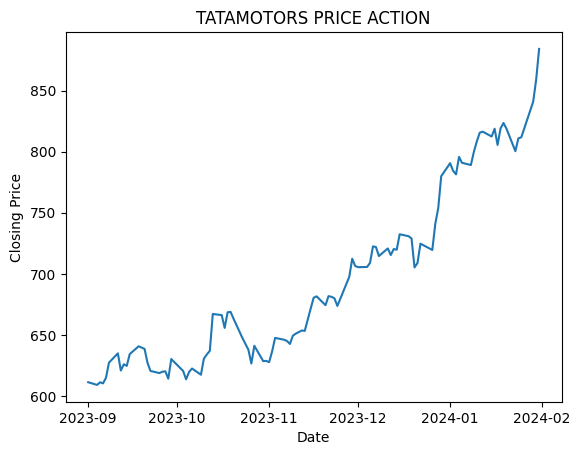

In [24]:
#plot closing price of share price
plt.plot(df_rm_duplicates.index,df_rm_duplicates['CH_CLOSING_PRICE'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('TATAMOTORS PRICE ACTION')
plt.show()

In [25]:
modified_df1 = df_rm_duplicates.CH_CLOSING_PRICE.values.astype('float32')

In [26]:
 closing_stock = modified_df1.reshape(-1, 1) #re shape input

In [27]:
closing_stock.shape

(103, 1)

In [28]:
ratio of train, validation data and test data
n_train = int(len(closing_stock) * 0.80)
n_remaining = len(closing_stock) - n_train

n_val = int(n_remaining*0.50)
n_test = n_remaining - n_val 
print("Train samples:",n_train, "Validation Samples:",n_val,"Test Samples:", n_test)

Train samples: 82 Validation Samples: 10 Test Samples: 11


In [29]:
#split train, validation and test data
train_data = closing_stock[0:n_train]
val_data=closing_stock[n_train:n_train+n_val]
test_data=closing_stock[n_train+n_val:]

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
#normalize all required data
scaler=MinMaxScaler(feature_range=(0,1))
train=scaler.fit_transform(train_data)
val=scaler.transform(val_data)
test=scaler.transform(test_data)

In [33]:
#create input data set as per time series use case
def create_dataset(data , n_features):
    dataX, dataY = [], []
    for i in range(len(data)-n_features-1):
        a = data[i:(i+n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)

In [34]:
n_features = 2 #no. of records 

In [35]:
#ready train, val and test data
trainX, trainY = create_dataset(train, n_features)
valX, valY = create_dataset(val, n_features)
testX, testY = create_dataset(test, n_features)

In [36]:
#reshape all data
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
valX = valX.reshape(valX.shape[0] , 1 ,valX.shape[1])
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])

In [37]:
import tensorflow as tf
tf.random.set_seed(42)

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [38]:
#Sequential model to be prepared
model=keras.Sequential()

In [39]:
#model architecture
# First GRU layer
model.add(layers.GRU(units=100, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Second GRU layer
model.add(layers.GRU(units=150, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Third GRU layer
model.add(layers.GRU(units=100, activation='tanh'))
model.add(layers.Dropout(0.2))

# The output layer
model.add(layers.Dense(units=1, kernel_initializer='he_uniform', activation='linear'))

In [40]:
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate = 0.0005) , metrics = ['mean_squared_error'])

In [41]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 100)            31200     
                                                                 
 dropout (Dropout)           (None, 1, 100)            0         
                                                                 
 gru_1 (GRU)                 (None, 1, 150)            113400    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 gru_2 (GRU)                 (None, 100)               75600     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 1

In [42]:
history = model.fit(trainX,trainY,epochs=100,batch_size=15, verbose=1, validation_data = (valX,valY))

Epoch 1/100



6/6 [==============================] - 20s 443ms/step - loss: 0.1313 - mean_squared_error: 0.1313 - val_loss: 0.9095 - val_mean_squared_error: 0.9095
Epoch 2/100
6/6 [==============================] - 0s 31ms/step - loss: 0.0918 - mean_squared_error: 0.0918 - val_loss: 0.6471 - val_mean_squared_error: 0.6471
Epoch 3/100
6/6 [==============================] - 0s 29ms/step - loss: 0.0519 - mean_squared_error: 0.0519 - val_loss: 0.3652 - val_mean_squared_error: 0.3652
Epoch 4/100
6/6 [==============================] - 0s 25ms/step - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.1361 - val_mean_squared_error: 0.1361
Epoch 5/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0598 - val_mean_squared_error: 0.0598
Epoch 6/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0697 - val_mean_squared_error: 0.0697
Epoch 7/100
6/6 [==============================] -

In [43]:
import math

def model_score(model, X_train, y_train, X_val, y_val , X_test, y_test):
    print('Train Score:')
    train_score = model.evaluate(X_train, y_train, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format(train_score[0], math.sqrt(train_score[0])))

    print('Validation Score:')
    val_score = model.evaluate(X_val, y_val, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format (val_score[0], math.sqrt(val_score[0])))

    print('Test Score:')
    test_score = model.evaluate(X_test, y_test, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format (test_score[0], math.sqrt(test_score[0])))


model_score(model, trainX, trainY ,valX, valY , testX, testY)

Train Score:
MSE: 0.00296 , RMSE: 0.05
Validation Score:
MSE: 0.00247 , RMSE: 0.05
Test Score:
MSE: 0.00752 , RMSE: 0.09


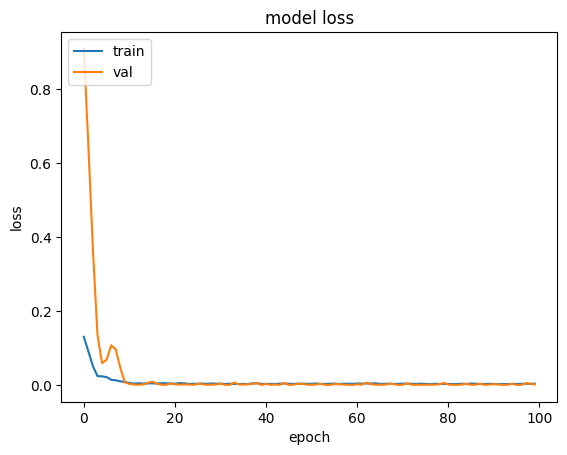

In [44]:
plt.plot(history.history['loss'])  # plotting train loss
plt.plot(history.history["val_loss"])  # plotting validation loss

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [45]:
pred=model.predict(testX)

1/1 [==============================] - 2s 2s/step


In [46]:
pred=scaler.inverse_transform(pred)
print(pred[:10])

[[819.7088 ]
 [832.11346]
 [838.44635]
 [834.1441 ]
 [814.4367 ]
 [823.03406]
 [825.28546]
 [855.80524]]


In [47]:
testY_actual = testY.reshape(testY.shape[0] , 1)
testY_actual = scaler.inverse_transform(testY_actual)
print(testY_actual[:10])

[[819.05   ]
 [823.55   ]
 [818.89996]
 [800.45   ]
 [810.9    ]
 [811.85   ]
 [841.     ]
 [858.85   ]]


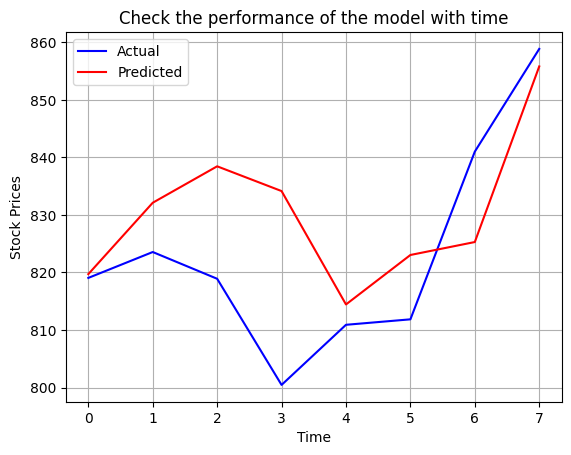

In [48]:
plt.plot(testY_actual , 'b')
plt.plot(pred , 'r')

plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the performance of the model with time')
plt.legend(['Actual', 'Predicted'], loc='upper left')

plt.grid(True)
plt.show()

In [49]:
df_rm_duplicates.head()

,CH_TRADE_HIGH_PRICE,CH_TRADE_LOW_PRICE,CH_OPENING_PRICE,CH_CLOSING_PRICE,CH_LAST_TRADED_PRICE,CH_PREVIOUS_CLS_PRICE,CH_TOT_TRADED_QTY,CH_TOT_TRADED_VAL,CH_52WEEK_HIGH_PRICE,CH_52WEEK_LOW_PRICE,CH_TOTAL_TRADES,CH_TIMESTAMP,VWAP
Timestamp_sorted,,,,,,,,,,,,,
2023-09-01,614.90,601.90,604.20,611.20,610.40,601.00,10297492,6.280526e+09,665.4,375.2,182015,2023-09-01,609.91
2023-09-04,615.60,606.00,615.60,609.00,609.70,611.20,8392665,5.111788e+09,665.4,375.2,173185,2023-09-04,609.08
2023-09-05,618.90,608.05,610.00,611.15,611.50,609.00,8560651,5.244448e+09,665.4,375.2,131391,2023-09-05,612.62
2023-09-06,612.55,605.60,611.15,610.25,610.60,611.15,6520064,3.968068e+09,665.4,375.2,142267,2023-09-06,608.59
2023-09-07,616.50,609.05,610.90,614.90,614.25,610.25,6520293,4.001137e+09,665.4,375.2,112863,2023-09-07,613.64


In [50]:
df=pd.DataFrame(df_rm_duplicates)

In [51]:
# Calculate moving average with a window size of 5
df['moving_average5D'] = df['CH_CLOSING_PRICE'].rolling(window=5).mean().astype("float")
#df.ffill(inplace=True)
# Handling NaN values (optional, here we backward fill)
df['moving_average5D'] = df['moving_average5D'].bfill()

# Calculate moving average with a window size of 10
df['moving_average10D'] = df['CH_CLOSING_PRICE'].rolling(window=10).mean()

# Handling NaN values (optional, here we backward fill)
df['moving_average10D'] = df['moving_average10D'].bfill()
# Calculate moving average with a window size of 20
df['moving_average20D'] = df['CH_CLOSING_PRICE'].rolling(window=20).mean()

# Handling NaN values (optional, here we backward fill)
df['moving_average20D'] = df['moving_average20D'].bfill()

In [52]:
df.head()

,CH_TRADE_HIGH_PRICE,CH_TRADE_LOW_PRICE,CH_OPENING_PRICE,CH_CLOSING_PRICE,CH_LAST_TRADED_PRICE,CH_PREVIOUS_CLS_PRICE,CH_TOT_TRADED_QTY,CH_TOT_TRADED_VAL,CH_52WEEK_HIGH_PRICE,CH_52WEEK_LOW_PRICE,CH_TOTAL_TRADES,CH_TIMESTAMP,VWAP,moving_average5D,moving_average10D,moving_average20D
Timestamp_sorted,,,,,,,,,,,,,,,,
2023-09-01,614.90,601.90,604.20,611.20,610.40,601.00,10297492,6.280526e+09,665.4,375.2,182015,2023-09-01,609.91,611.3,618.99,622.6875
2023-09-04,615.60,606.00,615.60,609.00,609.70,611.20,8392665,5.111788e+09,665.4,375.2,173185,2023-09-04,609.08,611.3,618.99,622.6875
2023-09-05,618.90,608.05,610.00,611.15,611.50,609.00,8560651,5.244448e+09,665.4,375.2,131391,2023-09-05,612.62,611.3,618.99,622.6875
2023-09-06,612.55,605.60,611.15,610.25,610.60,611.15,6520064,3.968068e+09,665.4,375.2,142267,2023-09-06,608.59,611.3,618.99,622.6875
2023-09-07,616.50,609.05,610.90,614.90,614.25,610.25,6520293,4.001137e+09,665.4,375.2,112863,2023-09-07,613.64,611.3,618.99,622.6875


In [53]:
df=df.drop(columns=["CH_TIMESTAMP"])
#convert dataframe in to array
df_array=df.values
# Reshape the numpy array to select all rows and only the 'Open', 'High', 'Low', 'Volume',"previous","traded volume","high","low","vwap" and 'Close' columns
reshaped_data = df_array[:, 1:]  # Exclude the first column (Date)

In [54]:
df.isnull().sum()

CH_TRADE_HIGH_PRICE      0
CH_TRADE_LOW_PRICE       0
CH_OPENING_PRICE         0
CH_CLOSING_PRICE         0
CH_LAST_TRADED_PRICE     0
CH_PREVIOUS_CLS_PRICE    0
CH_TOT_TRADED_QTY        0
CH_TOT_TRADED_VAL        0
CH_52WEEK_HIGH_PRICE     0
CH_52WEEK_LOW_PRICE      0
CH_TOTAL_TRADES          0
VWAP                     0
moving_average5D         0
moving_average10D        0
moving_average20D        0
dtype: int64

In [55]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(reshaped_data)

In [56]:
# Function to create sequences for LSTM
def create_sequences(data, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(data) - n_steps_in - n_steps_out + 1):
        X.append(data[i:(i + n_steps_in)])
        y.append(data[i + n_steps_in:i + n_steps_in + n_steps_out, 3])  # Assuming 'close' is the target
    return np.array(X), np.array(y)

# Define input and output sequence length
n_steps_in, n_steps_out = 2, 1  # These can be adjusted based on your data
X, y = create_sequences(scaled_data, n_steps_in, n_steps_out)

In [57]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
#split_ratio = 0.8  # 80% training, 10% testing
#split_index = int(split_ratio * len(X))
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=123,shuffle=False)

In [58]:
import random
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def create_model(units=100, dropout_rate=0.2, optimizer='adam',learning_rate=0.01):
    model = Sequential([
        LSTM(units, input_shape=(n_steps_in, n_features)),
        Dropout(dropout_rate),
        Dense(n_steps_out)
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [60]:
from sklearn.base import BaseEstimator, RegressorMixin

class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, units=100, dropout_rate=0.2, optimizer='adam', learning_rate=0.01,epochs=100, batch_size=32):
        self.units = units
        self.dropout_rate = dropout_rate
        self.optimizer = optimizer
        self.learning_rate = learning_rate 
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = create_model(units=self.units, dropout_rate=self.dropout_rate, optimizer=self.optimizer,learning_rate=self.learning_rate)
        
    def fit(self, X, y):
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self
        
    def predict(self, X):
        return self.model.predict(X)
    
    def score(self, X, y):
        return -self.model.evaluate(X, y, verbose=0)

In [61]:
from sklearn.model_selection import GridSearchCV

# Adjust these variables according to your dataset
n_steps_in, n_features, n_steps_out = 2, 14, 1  # Example values

param_grid = {
    'units': [50, 100],
    'dropout_rate': [0.2, 0.3],
    'optimizer': ['adam', 'rmsprop'],
    'learning_rate': [0.001, 0.01],
    'epochs': [50, 100],  # Consider lower values for quick testing
    'batch_size': [16, 32]
}

model = KerasRegressorWrapper()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)  # Make sure X_train and y_train are defined

print("Best parameters found: ", grid_search.best_params_)

1/1 [==============================] - 1s 748ms/step


1/1 [==============================] - 1s 754ms/step


1/1 [==============================] - 1s 724ms/step
Best parameters found:  {'batch_size': 16, 'dropout_rate': 0.3, 'epochs': 50, 'learning_rate': 0.001, 'optimizer': 'adam', 'units': 50}


In [ ]:
#Best parameters found:  {'batch_size': 16, 'dropout_rate': 0.3, 'epochs': 50, 'learning_rate': 0.001, 'optimizer': 'adam', 'units': 50}

In [75]:

import random
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(units=1))  # Output layer
# Compile the model
# Specify the optimizer with a learning rate





In [77]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [78]:
model.fit(X_train, y_train, epochs=100, batch_size=16,shuffle=False)

Epoch 1/100
5/5 [==============================] - 13s 19ms/step - loss: 0.0551
Epoch 2/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0370
Epoch 3/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0204
Epoch 4/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0082
Epoch 5/100
5/5 [==============================] - 0s 22ms/step - loss: 0.0097
Epoch 6/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0120
Epoch 7/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0109
Epoch 8/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0079
Epoch 9/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0063
Epoch 10/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0049
Epoch 11/100
5/5 [==============================] - 0s 30ms/step - loss: 0.0047
Epoch 12/100
5/5 [==============================] - 0s 25ms/step - loss: 0.0043
Epoch 13/100
5/5 [==============================

In [79]:
#with best parameters
model.evaluate(X_test, y_test)
predictions = model.predict(X_test)

1/1 [==============================] - 3s 3s/step


In [80]:
# Assuming 'predictions' is your (14,1) shaped array
# and 'scaler' was originally fit on data with 42 features

# Create a dummy array with the correct shape
dummy = np.zeros((predictions.shape[0], 14))  # Create dummy data with the shape (10,14)

# Assume predictions correspond to the first feature the scaler was fit on
dummy[:, 0] = predictions.ravel()  # Replace the first column with your predictions

# Apply inverse transformation
predictions_inverse = scaler.inverse_transform(dummy)[:, 0].reshape(-1, 1)  # Extract the relevant feature
print(predictions_inverse)

[[785.63065643]
 [776.02518743]
 [773.03623652]
 [775.8612803 ]
 [783.73974515]
 [778.62601241]
 [781.96749546]
 [789.19384724]
 [794.49275234]
 [796.82453675]
 [793.84539453]
 [794.52713768]
 [798.48383741]
 [797.51045447]
 [799.17846525]
 [796.98075386]
 [798.89352675]
 [796.20326221]
 [797.25498912]
 [809.72760864]
 [833.71110963]]


In [81]:
import math

def model_score(model, X_train, y_train, X_test, y_test):
    print('Train Score:')
    train_score = model.evaluate(X_train, y_train, verbose=0)
    print("MSE: {:.5f}, RMSE: {:.2f}".format(train_score, math.sqrt(train_score)))

    print('Test Score:')
    test_score = model.evaluate(X_test, y_test, verbose=0)
    print("MSE: {:.5f}, RMSE: {:.2f}".format(test_score, math.sqrt(test_score)))

# Example usage
model_score(model, X_train, y_train, X_test, y_test)

Train Score:
MSE: 0.00162, RMSE: 0.04
Test Score:
MSE: 0.00275, RMSE: 0.05


In [102]:
# Assuming predictions_inverse is a numpy array
predictions_df = pd.DataFrame(predictions_inverse, columns=['Predicted'])


In [120]:
actual=df.iloc[-21:]["CH_CLOSING_PRICE"].to_numpy()

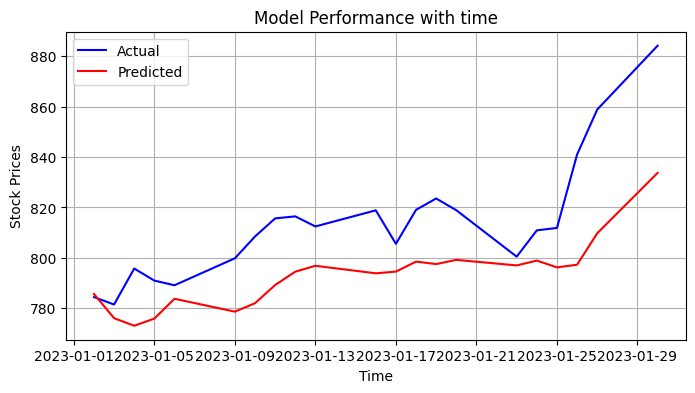

In [125]:
time_periods=pd.date_range(start='2023-01-02',periods=21, freq="B")
# Plotting the actual vs predicted values
plt.figure(figsize=(8, 4))  #figsize
plt.plot( time_periods,actual, "b", label='Actual')
plt.plot( time_periods,predictions_df, 'r', label='Predicted')

plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Model Performance with time')
plt.legend(loc='upper left')

plt.grid(True)
plt.show()